# PCA dataset dígitos

## Inicializamos las librerías

In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

#### Librerías de sklearn para este problema

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Cargamos el dataset 

In [3]:
digits = datasets.load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### Digits viene como un diccionario, por lo que vamos a extraer la información que nos interesa para montar nuestro dataset

In [5]:
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                     columns= digits['feature_names'] + ['target'])

In [6]:
df.head(10)

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   
5        0.0        0.0       12.0       10.0        0.0        0.0   
6        0.0        0.0        0.0       12.0       13.0        0.0   
7        0.0        0.0        7.0        8.0       13.0       16.0   
8        0.0        0.0        9.0       14.0        8.0        1.0   
9        0.0        0.0       11.0       12.0        0.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   
5        0.0        0.0        0.0        0.0  ...        0.0        0.0   
6        0.0        0.0        0.0        0.0  ...        0.0        0.0   
7       15.0        1.0        0.0        0.0  ...        0.0        0.0   
8        0.0        0.0        0.0        0.0  ...        0.0        0.0   
9        0.0        0.0        0.0        2.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   
1        0.0        0.0       11.0       16.0       10.0        0.0   
2        0.0        0.0        3.0       11.0       16.0        9.0   
3        0.0        7.0       13.0       13.0        9.0        0.0   
4        0.0        0.0        2.0       16.0        4.0        0.0   
5        0.0        9.0       16.0       16.0       10.0        0.0   
6        0.0        1.0        9.0       15.0       11.0        3.0   
7        0.0       13.0        5.0        0.0        0.0        0.0   
8        0.0       11.0       16.0       15.0       11.0        1.0   
9        0.0        9.0       12.0       13.0        3.0        0.0   

   pixel_7_7  target  
0        0.0     0.0  
1        0.0     1.0  
2        0.0     2.0  
3        0.0     3.0  
4        0.0     4.0  
5        0.0     5.0  
6        0.0     6.0  
7        0.0     7.0  
8        0.0     8.0  
9        0.0     9.0  

[10 rows x 65 columns]

## Visualización de los dígitos

Vamos a visualizar en este caso los 10 primeros dígitos. Puesto que tenemos 64 píxeles para cada imagen, vamos a representar cada una de estas en matrices de 8x8.

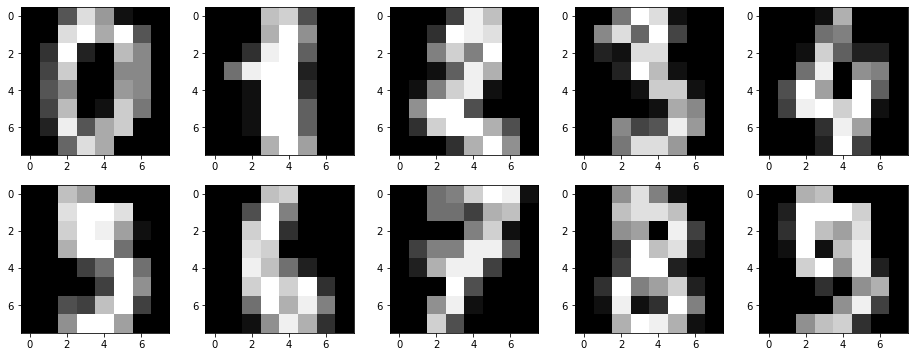

In [7]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(df.values[i,:-1].reshape([8,8]), cmap='gray')

Nuestros datos tienen 64 dimensiones, pero nosotros vamos a reducirlos a 2 dimensiones y visualizar su distribución.

## PCA

### Vamos a quedarnos con las dos componentes que maximicen la ganancia

In [8]:
pca = PCA(n_components = 2, random_state = 42)

In [9]:
pca_2 = pca.fit_transform(df[digits["feature_names"]])

In [10]:
df_pca = pd.DataFrame({"pc1":pca_2[:,0], "pc2":pca_2[:,1], "target": df["target"]})

In [11]:
df_pca.head(10)

pc1        pc2  target
0  -1.259471  21.274884     0.0
1   7.957597 -20.768700     1.0
2   6.991933  -9.955987     2.0
3 -15.906110   3.332466     3.0
4  23.306864   4.269058     4.0
5 -14.087083   7.914450     5.0
6  21.363403   5.288338     6.0
7  -2.952588 -21.071664     7.0
8  -5.255133   1.183358     8.0
9  -5.480206   8.076320     9.0

#### Vamos a ver el ratio de la varianza explicada para cada una de las dos variables

In [12]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [13]:
pca.explained_variance_ratio_.sum()

0.2850936482369274

Estas dos variables solo explican el 28,5% de la información del conjunto de datos original.

<BarContainer object of 2 artists>

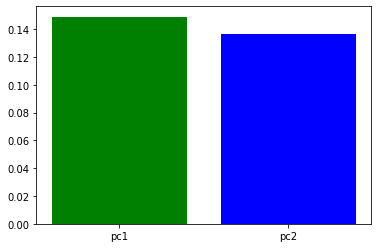

In [14]:
plt.bar(["pc1", "pc2"], pca.explained_variance_ratio_, color = ["green", "blue"])

#### A continucación, visualizamos nuestras componentes.

Text(0, 0.5, '2º autovector pc2')

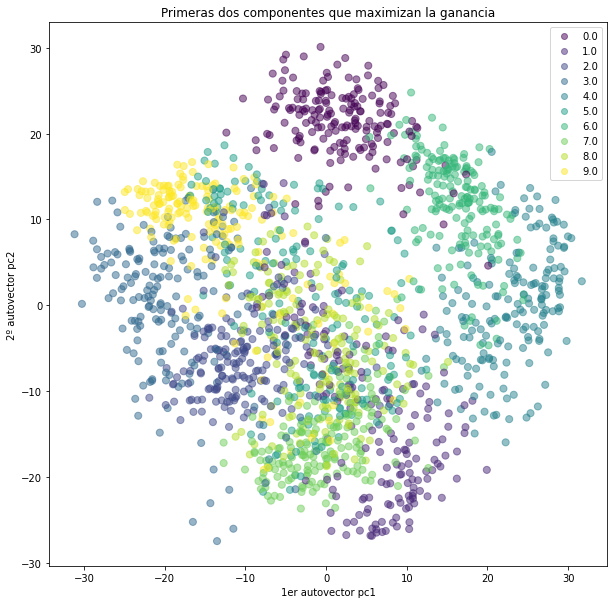

In [15]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
scatter = plt.scatter(df_pca["pc1"], df_pca["pc2"], marker = "o", s = 50, c = df_pca["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.target.unique().tolist())
plt.title("Primeras dos componentes que maximizan la ganancia")
plt.xlabel("1er autovector pc1")
plt.ylabel("2º autovector pc2")

### Repetimos el proceso, pero ahora vamos a quedarnos con las tres componentes principales

In [16]:
pca = PCA(n_components = 3, random_state = 42)

In [17]:
pca_3 = pca.fit_transform(df[digits["feature_names"]])

In [18]:
df_pca = pd.DataFrame({"pc1":pca_3[:,0], "pc2":pca_3[:,1], "pc3":pca_3[:,2], "target": df["target"]})

In [19]:
df_pca.head(10)

pc1        pc2        pc3  target
0  -1.259465  21.274884  -9.463062     0.0
1   7.957613 -20.768698   4.439498     1.0
2   6.991921  -9.955988   2.958569     2.0
3 -15.906104   3.332465   9.824365     3.0
4  23.306867   4.269060  -5.675126     4.0
5 -14.087086   7.914449   0.392492     5.0
6  21.363410   5.288339  15.087404     6.0
7  -2.952609 -21.071666 -12.282890     7.0
8  -5.255134   1.183359   5.796259     8.0
9  -5.480198   8.076324  -5.028085     9.0

#### Vamos a ver el ratio de la varianza explicada para cada una de las dos variables

In [20]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

In [21]:
pca.explained_variance_ratio_.sum()

0.4030395858767183

Con estas tres componentes estamos explicando el 40% de la información del dataset original.

<BarContainer object of 3 artists>

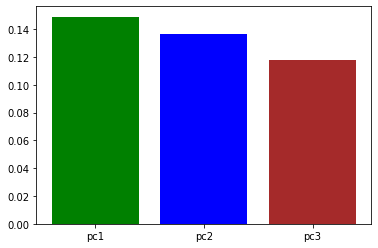

In [22]:
plt.bar(["pc1", "pc2", "pc3"], pca.explained_variance_ratio_, color = ["green", "blue", "brown"])

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_4831/841114223.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


Text(0.5, 0, '3er autovector pc2')

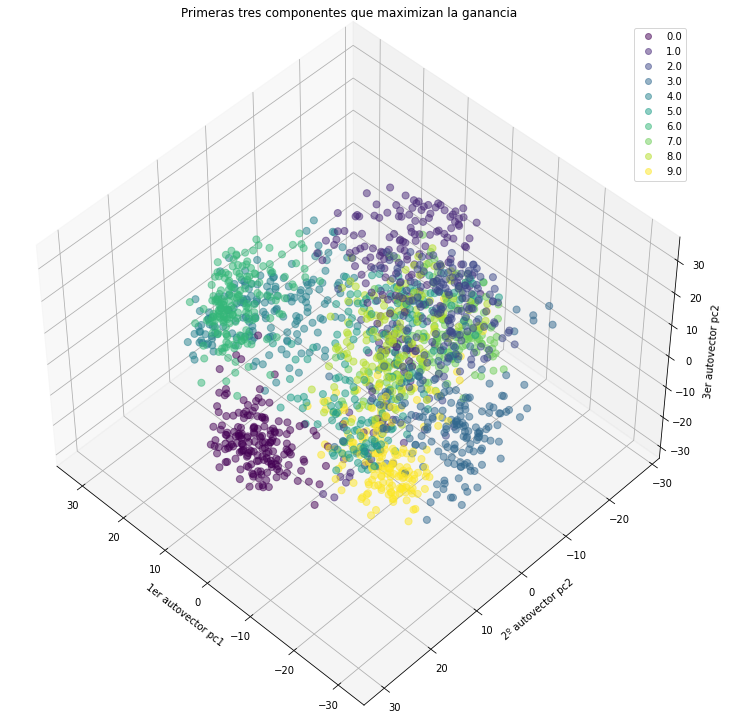

In [23]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_pca["pc1"], df_pca["pc2"], df_pca["pc3"], marker = "o", s = 50, c = df_pca["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.target.unique().tolist())
ax.set_title("Primeras tres componentes que maximizan la ganancia")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

In [24]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_pca["pc1"],y = df_pca["pc2"], z = df_pca["pc3"], color=df_pca["target"])
fig.update_layout(title='Primeras tres componentes que maximizan la ganancia', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>

In [25]:
from sklearn.manifold import TSNE

# t-SNE

In [29]:
tsne = TSNE(n_components = 2, random_state = 42, n_iter = 5000)

In [30]:
tsne_2 = tsne.fit_transform(df[digits["feature_names"]])

In [32]:
df_tsne = pd.DataFrame({"x": tsne_2[:,0], "y": tsne_2[:,1], "target": df["target"]})

In [33]:
df_tsne.head()

x          y  target
0  100.702789  -1.507061     0.0
1  -28.767151  -2.804013     1.0
2   -9.992463  30.178600     2.0
3   36.137760  23.353571     3.0
4  -61.498619 -37.893085     4.0

Text(0, 0.5, 'y')

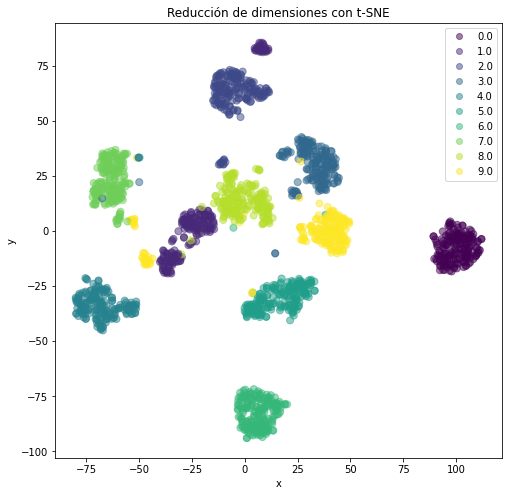

In [35]:
fig = plt.figure(figsize = (8,8))
plt.axis("on")
plt.clf()
scatter = plt.scatter(df_tsne["x"], df_tsne["y"], marker = "o", s = 50, c = df_tsne["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_tsne.target.unique().tolist())
plt.title("Reducción de dimensiones con t-SNE")
plt.xlabel("x")
plt.ylabel("y")

In [36]:
tsne = TSNE(n_components = 3, random_state = 42, n_iter = 5000)

In [37]:
tsne_3 = tsne.fit_transform(df[digits["feature_names"]])

In [38]:
df_tsne = pd.DataFrame({"x": tsne_3[:,0], "y": tsne_3[:,1], "z": tsne_3[:,2], "target": df["target"]})

In [39]:
df_tsne.head()

x          y          z  target
0  -2.959568  -8.018858 -25.883085     0.0
1  -8.540165  -1.419508   1.833013     1.0
2  -5.783076   9.459640   2.904119     2.0
3  13.118470   8.146136   7.719762     3.0
4  -7.660626 -14.450963  -2.130032     4.0

In [40]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_tsne["x"],y = df_tsne["y"], z = df_tsne["z"], color=df_tsne["target"])
fig.update_layout(title='Reducción de dimensiones con t-SNE R3', autosize=False,

                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>